# Author - Shekar Roy

## Project 1/2

##  DOMAIN - Digital content and entertainment industry
## CONTEXT - The  objective  of  this  project  is  to  build  a  text  classification  model  that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import nltk

## Import and analyse the data set

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print('Shape of X_train data set is:', X_train.shape, 'Shape of y_train data set is:', y_train.shape)
print('Shape of X_test data set is:', X_test.shape, 'Shape of y_test data set is:', y_test.shape)

Shape of X_train data set is: (25000,) Shape of y_train data set is: (25000,)
Shape of X_test data set is: (25000,) Shape of y_test data set is: (25000,)


### Perform relevant sequence adding on the data

In [ ]:
review = np.concatenate((X_train, X_test), axis=0)
sentiment = np.concatenate((y_train, y_test), axis=0)

## Data Analysis

### Print shape of features and labels

In [ ]:
np.unique(sentiment)

array([0, 1])

In [ ]:
print('Total number of reviews:', review.shape)
print('Total number of sentiments:', sentiment.shape)

Total number of reviews: (50000,)
Total number of sentiments: (50000,)


In [ ]:
print(review[15])

[1, 6, 964, 437, 7, 58, 43, 1402, 11, 6, 171, 3978, 701, 570, 997, 4179, 1880, 6, 5211, 5288, 550, 1270, 1222, 4891, 519, 6141, 5, 236, 21, 24, 222, 6, 3934, 2, 40, 109, 19, 1513, 8, 1513, 893, 8016, 5, 1493, 11, 6, 2, 5, 25, 80, 28, 14, 806, 1338, 18, 6, 20, 13, 66, 188, 6, 462, 46, 7, 4, 884, 445, 40, 2699, 2, 9671, 4, 114, 16, 1198, 200, 5400, 5, 701, 2975, 89, 111, 2, 26, 1688, 8, 97, 6, 2476, 1431, 2863, 2134, 23, 6, 519, 1522, 1527, 470, 21, 161, 36, 413, 2, 143, 2, 4756, 14, 16, 398, 18, 2, 6286, 12, 299, 40, 6, 374, 500, 13, 122, 358, 4, 2, 1530, 5128, 11, 4, 2092, 151]


In [ ]:
print(sentiment[15])

0


In [ ]:
print(review[1050])

[1, 13, 447, 14, 20, 12, 9, 1281, 8, 79, 6, 3132, 7, 1208, 2, 2571, 5, 14, 20, 9462, 4000, 139, 5, 1127, 5896, 5, 2, 122, 12, 13, 69, 57, 326, 474, 30, 38, 3889, 34, 12, 51, 35, 480, 168, 33, 89, 1536, 9518, 235, 12, 16, 1211, 8, 106, 179, 2035, 75, 32, 391, 4, 997, 5, 4, 7529, 150, 552, 7, 453, 21, 14, 9, 38, 38, 275, 51, 571, 54, 36, 216, 145, 5, 353, 8, 412, 6, 113, 36, 191, 12, 93, 72, 55, 1887, 7, 6, 1058, 604, 7, 349, 15, 26, 2, 187, 416, 11, 938, 24, 502, 8, 2198, 191, 1666, 191, 28, 119, 5625, 191, 855, 19, 1280, 926, 36, 235, 484, 972, 14, 9, 6, 666, 1521, 5, 31, 15, 218, 7470, 195, 1243, 2002, 1194, 263, 2169, 44, 2571, 9518, 75, 40, 98, 150, 21, 38, 51, 12, 152, 306, 8, 28, 93, 101, 1474, 8, 98, 45, 99, 522, 38, 12, 16, 6, 87, 22, 21, 13, 3785, 6, 176, 13, 28, 57, 85, 8044]


In [ ]:
print(sentiment[1050])

1


## Decode the feature value to get original sentence

In [ ]:
review_index = imdb.get_word_index()
review_words = {value:key for key, value in review_index.items()}

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
" ".join([review_words.get(i - 3, "$") for i in review[20]])

"$ shown in australia as $ this incredibly bad movie is so bad that you become $ and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school $ class the sets are pathetic but $ better than the $ and the acting is wooden br br the $ $ seems to have been stolen from the props $ of $ $ there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

#### Vectorizing the data

- Review with less than 10000 will be filled 0 so that everything will be equal


In [ ]:
def vectorizing(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [ ]:
review = vectorizing(review)
sentiment = np.array(sentiment).astype("float32")

#### Train and Test Data

In [ ]:
review_test = review[:10000]
sentiment_test = sentiment[:10000]

In [ ]:
review_train = review[10000:]
sentiment_train = sentiment[10000:]

#### Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout

### Model :- Logistic Regression

In [ ]:
log_reg = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=500, C=1, random_state=42)

In [ ]:
log_reg.fit(review_train, sentiment_train)

LogisticRegression(C=1, max_iter=500, random_state=42)

In [ ]:
predict_log_reg = log_reg.predict(review_test)

#### Model :- Naive Bayes

In [ ]:
NB = MultinomialNB()
NB.fit(review_train, sentiment_train)

MultinomialNB()

In [ ]:
predict_NB = NB.predict(review_test)

### Model :- Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
rf.fit(review_train, sentiment_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
predict_rf = rf.predict(review_test)

### Model :- Neural Network

In [ ]:
model = models.Sequential()

# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))

# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))

model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))

# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))

#Compile Model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
NN_Model = model.fit(review_train, sentiment_train, epochs= 10, batch_size = 500, validation_data = (review_test, sentiment_test))

Epoch 1/10
80/80 [==============================] - 4s 25ms/step - loss: 0.3915 - accuracy: 0.8274 - val_loss: 0.2637 - val_accuracy: 0.8957
Epoch 2/10
80/80 [==============================] - 1s 16ms/step - loss: 0.2099 - accuracy: 0.9192 - val_loss: 0.2654 - val_accuracy: 0.8917
Epoch 3/10
80/80 [==============================] - 1s 17ms/step - loss: 0.1473 - accuracy: 0.9463 - val_loss: 0.3009 - val_accuracy: 0.8903
Epoch 4/10
80/80 [==============================] - 1s 16ms/step - loss: 0.0991 - accuracy: 0.9672 - val_loss: 0.3512 - val_accuracy: 0.8886
Epoch 5/10
80/80 [==============================] - 1s 16ms/step - loss: 0.0652 - accuracy: 0.9779 - val_loss: 0.4346 - val_accuracy: 0.8826
Epoch 6/10
80/80 [==============================] - 1s 17ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.4675 - val_accuracy: 0.8816
Epoch 7/10
80/80 [==============================] - 1s 17ms/step - loss: 0.0340 - accuracy: 0.9884 - val_loss: 0.5350 - val_accuracy: 0.8820
Epoch 8/10
80

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print('Accuracy score for Logistic Regression - ', accuracy_score(sentiment_test, predict_log_reg))
print('Accuracy score for Naive Bayes - ', accuracy_score(sentiment_test, predict_NB))
print('Accuracy score for Random Forest - ', accuracy_score(sentiment_test, predict_rf))
print('Accuracy score for Neural Network - ', np.mean(NN_Model.history['val_accuracy']))

Accuracy score for Logistic Regression -  0.8716
Accuracy score for Naive Bayes -  0.8496
Accuracy score for Random Forest -  0.8192
Accuracy score for Neural Network -  0.8846700012683868


In [ ]:
print('          Classification Report for Logistic Regression \n')
print(classification_report(sentiment_test, predict_log_reg, target_names=['Positive','Negative']))

          Classification Report for Logistic Regression 

              precision    recall  f1-score   support

    Positive       0.87      0.87      0.87      4947
    Negative       0.88      0.87      0.87      5053

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
print('          Classification Report for Naive Bayes \n')
print(classification_report(sentiment_test, predict_NB, target_names=['Positive','Negative']))

          Classification Report for Naive Bayes 

              precision    recall  f1-score   support

    Positive       0.84      0.86      0.85      4947
    Negative       0.86      0.84      0.85      5053

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
print('          Classification Report for Random Forest \n')
print(classification_report(sentiment_test, predict_rf, target_names=['Positive','Negative']))

          Classification Report for Random Forest 

              precision    recall  f1-score   support

    Positive       0.85      0.78      0.81      4947
    Negative       0.80      0.86      0.83      5053

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [ ]:
predict_model = model.predict(review_test)
classes_x=np.argmax(predict_model ,axis=1)

In [ ]:
predict_model = predict_model[:, 0]



### Inference

    - On the Accuracy perspective Neural Network have bee in the top with 88% while Random Forest with least of 81%
    - On the preceision and recall Logistic Regression and Neural Network both are at higher side
    - On the F1-Score Neural Network tops the list

-- Validating the Prediction with actual value



In [ ]:
print(predict_model[5])

0.056683272


In [ ]:
print(sentiment_test[5])

0.0


In [ ]:
print(predict_model[10])

1.0


In [ ]:
print(sentiment_test[10])

1.0



## Conclusion

    - IMDB data set was loaded with pre defined train and test data frame
    - Data Analysis was performed after combining the test and train data set
    - Orginal sentence was displayed
    - 4 different models Logistic Regression, Naive Bayes, Random Forest and Neural Network model were built
    - Accuracy and classification report were created to finalise the best model
    - Neural Network is the best model with highest accuracy in the test data
    - Finally validated the predicted sentiment with actual sentiment



## Project 2/2

##### DOMAIN:  Social media analytics
##### CONTEXT: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using   hashtag   based   supervision   but   such   datasets   are   noisy   in   terms   of   labels   and language.  Furthermore,  many  tweets  are  replies  to  other  tweets  and  detecting  sarcasm  in these  requires  the  availability  of  contextual  tweets.In  this  hands-on  project,  the  goal  is  to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

### Reference

https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [77]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

import random, re
assert tf.__version__ >= '2.0'
%matplotlib inline

# Models
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Set random state
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

### 1. Read and explore the data

In [ ]:
data = pd.read_json('/content/drive/MyDrive/NLP/Sarcasm_Headlines_Dataset.json', lines = True)
print(f'Data has {data.shape[0]} rows and {data.shape[1]} columns. Here are the first five rows of the data...')
display(data.head())

In [ ]:
print('--'*30); print('Value Counts for `is_sarcastic` label'); print('--'*30)
print(f'Sarcastic count: {data[data.is_sarcastic == 1].shape[0]} i.e. {round(data[data.is_sarcastic == 1].shape[0]/data.shape[0]*100, 0)}%')
print(f'Non Sarcastic count: {data[data.is_sarcastic == 0].shape[0]} i.e. {round(data[data.is_sarcastic == 0].shape[0]/data.shape[0]*100, 0)}%')

print('--'*30); print('Distributon of `is_sarcastic` label'); print('--'*30)
_ = data['is_sarcastic'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Sarcastic', 'Non-sarcastic'], figsize = (10, 6))


In [ ]:
print('Analysis of `is_sarcastic` label by news website'); print('--'*30)

hf = data[data['article_link'].str.contains('huffingtonpost.com')].shape[0]
op = data[data['article_link'].str.contains('theonion.com')].shape[0]

is_sarcastic_hf = data.loc[(data['article_link'].str.contains('huffingtonpost.com')) & (data['is_sarcastic'] == 1)].shape[0]
not_sarcastic_hf = data.loc[(data['article_link'].str.contains('huffingtonpost.com')) & (data['is_sarcastic'] == 0)].shape[0]

is_sarcastic_op = data.loc[(data['article_link'].str.contains('theonion.com')) & (data['is_sarcastic'] == 1)].shape[0]
not_sarcastic_op = data.loc[(data['article_link'].str.contains('theonion.com')) & (data['is_sarcastic'] == 0)].shape[0]

display(pd.DataFrame([[is_sarcastic_hf, is_sarcastic_op], [not_sarcastic_hf, not_sarcastic_op]], 
                     columns = ['huffingtonpost', 'theonion'], index = ['Sarcastic', 'Non-sarcastic']))

In [ ]:
# Checking 5 random headlines and labels from the data
print('--'*30); print('Checking 5 random headlines and labels from the data'); print('--'*30)
rands = random.sample(range(1, data.shape[0]), 5)
headlines, labels = list(data.loc[rands, 'headline']), list(data.loc[rands, 'is_sarcastic'])

_ = [print(f'Headline: {head}\nlabel: {label}\n') for head, label in zip(headlines, labels)]

In [ ]:
# Checking 5 random headlines and labels from the data where the length of headline is > 100
print('--'*30); print('Checking 5 random headlines and labels from the data where the length of headline is > 100'); print('--'*30)
indexes = list(data.loc[data['headline'].str.len() > 100, 'headline'].index)
rands = random.sample(indexes, 5)
headlines, labels = list(data.loc[rands, 'headline']), list(data.loc[rands, 'is_sarcastic'])

_ = [print(f'Headline: {head}\nlabel: {label}\n') for head, label in zip(headlines, labels)]

print('--'*30); print('Distributon of label where the length of headline is > 100'); print('--'*30)
_ = data.loc[indexes, 'is_sarcastic'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', 
                                                          labels = ['Sarcastic', 'Non-sarcastic'], figsize = (10, 6))

### Observations

  - 48% of the data have sarcastic labels whereas 52% don't.
  - Suprising! There are no headlines from HuffPost that are sarcastic whereas all but one from The Onion are sarcastic.
  - Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
  - There are digits in the headlines for e.g. 3 things i needed to hear when i weighed 300 pounds where removing the digits wouldn't help.
  - 89% of data with length of sentence (headlines) > 100 are sarcastic headlines.



## 2. Drop one column

In [ ]:
print('Dropping `article_link` column from the data'); print('--'*30)
data.drop('article_link', axis = 1, inplace = True)

## 3. Get length of each sentence

In [ ]:
lengths = data['headline'].str.len()

In [ ]:
print('Headline:', data['headline'][1])
print('Length:',lengths[1])


In [ ]:
lengths.min()

In [ ]:
lengths.max()

### Data Preprocessing

- Few of the data pre-processing steps taken before applying model on the data

    - Converting to lower case, avoid any capital cases
    - Converting apostrophe to the standard lexicons
    - Removing punctuations
    - Lemmatization



In [ ]:
import nltk; nltk.download('wordnet'); nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
nltk.download('averaged_perceptron_tagger')

In [ ]:
appos = {"ain't": "am not", "aren't": "are not", "can't": "cannot", 
         "can't've": "cannot have", "'cause": "because", 
         "could've": "could have", "couldn't": "could not", 
         "couldn't've": "could not have", "didn't": "did not", 
         "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
         "hadn't've": "had not have", "hasn't": "has not", 
         "haven't": "have not", "he'd": "he would", "he'd've": "he would have", 
         "he'll": "he will", "he'll've": "he will have", 
         "he's": "he is", "how'd": "how did", 
         "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
         "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
         "I'll've": "I will have", "I'm": "I am", "I've": "I have", 
         "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
         "it'll": "it will", "it'll've": "it will have", "it's": "it is", 
         "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
         "might've": "might have", "mightn't": "might not", 
         "mightn't've": "might not have", "must've": "must have", 
         "mustn't": "must not", "mustn't've": "must not have", 
         "needn't": "need not", "needn't've": "need not have",
         "o'clock": "of the clock", "oughtn't": "ought not", 
         "oughtn't've": "ought not have", "shan't": "shall not", 
         "sha'n't": "shall not", "shan't've": "shall not have", 
         "she'd": "she would", "she'd've": "she would have", 
         "she'll": "she will", "she'll've": "she will have",
         "she's": "she is", "should've": "should have", 
         "shouldn't": "should not", "shouldn't've": "should not have", 
         "so've": "so have", "so's": "so is", 
         "that'd": "that had", "that'd've": "that would have", 
         "that's": "that that is", "there'd": "there would", 
         "there'd've": "there would have", "there's": "there is", 
         "they'd": "they would", "they'd've": "they would have", 
         "they'll": "they will", "they'll've": "they will have", 
         "they're": "they are", "they've": "they have", 
         "to've": "to have", "wasn't": "was not", "we'd": "we would", 
         "we'd've": "we would have", "we'll": "we will", 
         "we'll've": "we will have", "we're": "we are", 
         "we've": "we have", "weren't": "were not", 
         "what'll": "what will", "what'll've": "what will have", 
         "what're": "what are", "what's": "what is", 
         "what've": "what have", "when's": "when is", 
         "when've": "when have", "where'd": "where did", 
         "where's": "where is", "where've": "where have", 
         "who'll": "who will", "who'll've": "who will have", 
         "who's": "who is", "who've": "who have", 
         "why's": "why is", "why've": "why have", "will've": "will have", 
         "won't": "will not", "won't've": "will not have",
         "would've": "would have", "wouldn't": "would not", 
         "wouldn't've": "would not have", "y'all": "you all", 
         "y'all'd": "you all would", "y'all'd've": "you all would have", 
         "y'all're": "you all are", "y'all've": "you all have", 
         "you'd": "you would", "you'd've": "you would have",
         "you'll": "you will", "you'll've": "you will have", 
         "you're": "you are", "you've": "you have"}

In [ ]:
# Helper function to replace appos
def replace_words(headline):
    cleaned_headlines = []
    for word in str(headline).split():
        if word.lower() in appos.keys():
            cleaned_headlines.append(appos[word.lower()])
        else:
            cleaned_headlines.append(word)
    return ' '.join(cleaned_headlines)

# Helper function to remove punctuations
# Reference: https://www.programiz.com/python-programming/methods/string/translate
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' #string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Helper function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    return ''.join([lemmatizer.lemmatize(word) for word in text])

# Helper function to remove stopwords
stoplist = set(stopwords.words('english'))
stoplist.remove('not')
def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stoplist])
# Second helper function for lemmatizing
lemmatizer = WordNetLemmatizer()
def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))
# Helper function for wordcloud
# Reference: https://www.kaggle.com/aashita/word-clouds-of-various-shapes
def plot_wordcloud(text, mask = None, max_words = 500, max_font_size = 40, 
                   figure_size = (12, 6), title = None, title_size = 15):
    wordcloud = WordCloud(background_color = 'white', max_words = max_words,
                          random_state = 42, width = 350, height = 150, 
                          mask = mask, stopwords = stoplist, collocations = False)
    wordcloud.generate(str(text))
    
    plt.figure(figsize = figure_size)
    plt.imshow(wordcloud, interpolation = 'bilinear');
    plt.title(title, fontdict = {'size': title_size, 'color': 'black', 
                               'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [ ]:
print('--'*30); print('Converting headlines to lower case')
data['cleaned_headline'] = data['headline'].apply(lambda x : x.lower())

print('Replacing apostrophes to the standard lexicons')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x : replace_words(x))

print('Removing punctuations')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: remove_punctuation(x))

print('Applying Lemmatizer')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: lem(x))

print('Removing multiple spaces between words')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: re.sub(' +', ' ', x))

# print('Removing stopwords')
# data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: remove_stopwords(x))
print('--'*30)

In [ ]:
# Get length of each line
data['line_length'] = data['cleaned_headline'].str.len()
print('--'*40); print('Get the length of each line, find the lines ranges'); 
print('Length of line ranges from', data['line_length'].min(), 'to', data['line_length'].max()); print('--'*40)

print('Minimum line length: {}'.format(data['line_length'].min()))
print('Maximum line length: {}'.format(data['line_length'].max()))
print('Line with maximum length:\n{}'.format(data[data['line_length'] == data['line_length'].max()]['cleaned_headline'].values[0]))

In [ ]:
print('--'*40); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
# Get length of each line
data['nb_words'] = data['cleaned_headline'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['nb_words'].min()))
print('Maximum number of words: {}'.format(data['nb_words'].max()))
print('Line with maximum number of words: \n{}'.format(data[data['nb_words'] == data['nb_words'].max()]['cleaned_headline'].values[0]))

In [ ]:
print('Word Cloud of Sarcastic and Non-sarcastic Headlines')
data['headline'] = data['headline'].fillna('')
sarcastic_headlines = ' '.join(data.loc[data['is_sarcastic'] == 1, 'cleaned_headline'])
plot_wordcloud(sarcastic_headlines, title = 'Word Cloud of Sarcastic Headlines')

non_sarcastic_headlines = ' '.join(data.loc[data['is_sarcastic'] == 0, 'cleaned_headline'])
plot_wordcloud(non_sarcastic_headlines, title = 'Word Cloud of Isn\'t Sarcastic Headlines')

## 4. Define parameters

In [ ]:
max_features = 10000
maxlen = data['nb_words'].max()
embedding_size = 50

## 5. Get indices for words

In [ ]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(data['cleaned_headline']))

## 6. Create features and labels

In [ ]:
X = tokenizer.texts_to_sequences(data['cleaned_headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print(f'Number of Samples: {len(X)}')
print(f'Number of Labels: {len(y)}')
print(f'\nFirst headline:\n{X[0]}\n\nLabel of the first headline: {y[0]}')

Number of Samples: 28619
Number of Labels: 28619

First headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  326 2958 5781 2067    2  692 1093]

Label of the first headline: 1


## 7. Get vocab size

In [ ]:
# Reserve padding (indexed zero)
w2i = tokenizer.word_index
vocab_size = len(w2i) + 1
print(f'Number of unique tokens: {vocab_size}')


Number of unique tokens: 26042


### 8. Create a weight matrix using GloVe embeddings

In [69]:
f = open( "/content/drive/MyDrive/NLP/glove.6B.50d.txt", encoding="utf8")
embeddings = {}
for o in f:
    word = o.split(' ')[0]
    embd = o.split(' ')[1:]
    embd = np.asarray(embd, dtype = 'float32')
    embeddings[word] = embd

In [70]:
# Getting the minimum number of words
num_words = min(max_features, vocab_size) + 1

embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i > max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

250311

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)

print('---'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print('---'*20, f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

------------------------------------------------------------ 
Number of rows in training dataset: 22895
Number of columns in training dataset: 151
Number of unique words in training dataset: 9975
------------------------------------------------------------ 
Number of rows in test dataset: 5724
Number of columns in test dataset: 151
Number of unique words in test dataset: 7640


In [78]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, embeddings_initializer = Constant(embedding_matrix), input_length = maxlen, trainable = False))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5, input_shape = (256,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)  
mc = ModelCheckpoint('sarcasm_detector.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
lr_r = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5)
logdir = 'log'; tb = TensorBoard(logdir, histogram_freq = 1)
callbacks = [es, mc, lr_r, tb]

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 151, 50)           500050    
                                                                 
 bidirectional_2 (Bidirectio  (None, 151, 256)         183296    
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [79]:
batch_size = 100
epochs = 6

h = model.fit(x_train, y_train, epochs = epochs, validation_split = 0.2, batch_size = batch_size, verbose = 2, callbacks = callbacks)

Epoch 1/6

Epoch 00001: val_loss improved from inf to 0.55546, saving model to sarcasm_detector.h5
184/184 - 27s - loss: 0.6541 - accuracy: 0.6017 - val_loss: 0.5555 - val_accuracy: 0.7283 - lr: 0.0010 - 27s/epoch - 145ms/step
Epoch 2/6

Epoch 00002: val_loss improved from 0.55546 to 0.46603, saving model to sarcasm_detector.h5
184/184 - 14s - loss: 0.5414 - accuracy: 0.7365 - val_loss: 0.4660 - val_accuracy: 0.7842 - lr: 0.0010 - 14s/epoch - 75ms/step
Epoch 3/6

Epoch 00003: val_loss improved from 0.46603 to 0.42357, saving model to sarcasm_detector.h5
184/184 - 14s - loss: 0.4682 - accuracy: 0.7808 - val_loss: 0.4236 - val_accuracy: 0.8043 - lr: 0.0010 - 14s/epoch - 74ms/step
Epoch 4/6

Epoch 00004: val_loss improved from 0.42357 to 0.39631, saving model to sarcasm_detector.h5
184/184 - 14s - loss: 0.4330 - accuracy: 0.8028 - val_loss: 0.3963 - val_accuracy: 0.8211 - lr: 0.0010 - 14s/epoch - 75ms/step
Epoch 5/6

Epoch 00005: val_loss improved from 0.39631 to 0.39186, saving model to 

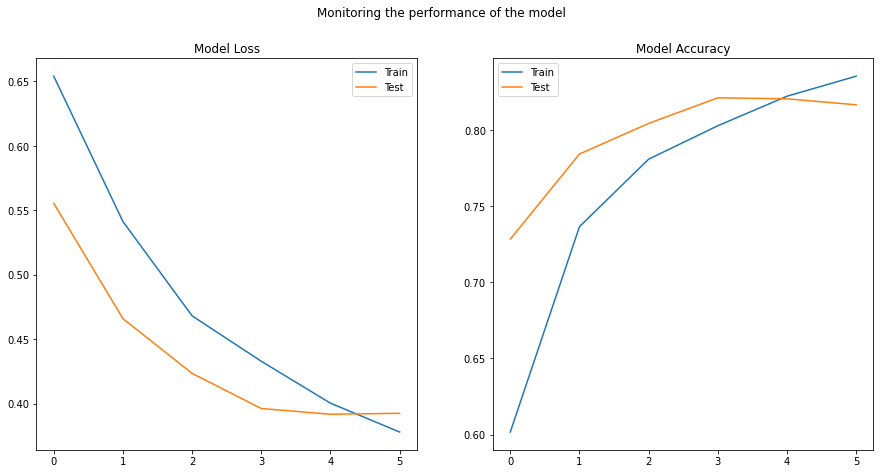

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the model')

ax1.plot(h.history['loss'], label = 'Train')
ax1.plot(h.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(h.history['accuracy'], label = 'Train')
ax2.plot(h.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [81]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print('Overall Accuracy: {}'.format(round(accuracy * 100, 0)))


Overall Accuracy: 82.0


In [82]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      3346
           1       0.74      0.85      0.79      2378

    accuracy                           0.82      5724
   macro avg       0.81      0.82      0.81      5724
weighted avg       0.82      0.82      0.82      5724



------------------------------------------------------------
Confusion Matrix


,Non-sarcastic,Sarcastic
Non-sarcastic,2644,351
Sarcastic,702,2027


------------------------------------------------------------


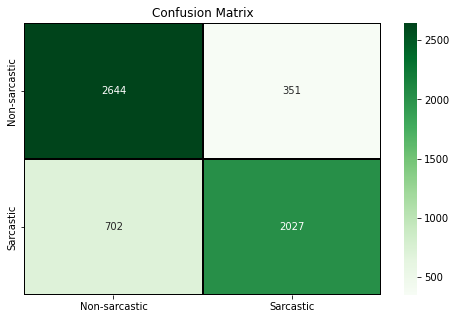

In [83]:
print('--'*30); print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm , index = ['Non-sarcastic', 'Sarcastic'] , columns = ['Non-sarcastic','Sarcastic'])
display(cm); print('--'*30)

plt.figure(figsize = (8, 5))
_ = sns.heatmap(cm, cmap= 'Greens', linecolor = 'black' , linewidth = 1 , annot = True, 
            fmt = '' , xticklabels = ['Non-sarcastic', 'Sarcastic'], 
            yticklabels = ['Non-sarcastic', 'Sarcastic']).set_title('Confusion Matrix')


## Conclusion

- Model achieved 83.53% accuracy on the test set
- classification report and confusion matrix were also printed